# **Postwork Sesión 5:  Limpieza de datos y agregaciones**

###Equipo 23

* Francisco Ricardo Arredondo Almuina - frankk_arredondo@hotmail.com
* Tamara Ytanyu Pérez Vázquez - tamara.ytanyu@gmail.com
* Jesus Emanuel Serrano Molina - emanuel.serm@gmail.com
* Carlos Eduardo Vidal Villeda - charlie.lalo@hotmail.com

#Objetivo
* Limpiar nuestro dataset de NaNs.
* Reindexar si es necesario
* Renombrar columnas si es necesario
* Experimentar la aplicación de agregaciones para explorar nuestro dataset

#Requisistos
* Tener un dataset, haberlo leído usando pandas y haber realizado una primer 
exploración básica.
* Tener un problema/curiosidad/hipótesis en mente que quieras responder con este dataset.
* Tener una serie de preguntas que creas que te pueden ayudar a responder esa hipótesis.

#Desarrollo
Ya que tenemos nuestro dataset en un `DataFrame` y que hemos realizado una primera exploración, ha llegado la hora de hacer un poco de limpieza. Limpiar tu `DataFrame` es sumamente importante para poder utilizarlo después de manera cómoda y apropiada. También vamos a explorar nuestro dataset usando agregaciones para ver si podemos empezar a responder algunas de las preguntas que nos hemos planteado. Los pasos que debes de seguir son los siguientes:

1. Explora tu dataset con el fin de encontrar los `NaNs` que contiene. Piensa en la distribución de `NaNs` por columna y por fila.
2. Piensa cuáles son los procedimientos que puedes aplicar a tus `NaNs`. ¿Tenemos que eliminar las filas/columnas que tienen esos `NaNs`? ¿O podríamos rellenar esos `NaNs` con algún valor de manera que podamos retener esas filas/columnas?
3. Limpia tu dataset de manera que no quede ningún `NaN`.
4. Reindexa tu dataset si lo consideras necesario.
5. Renombra tus columnas si lo consideras necesario.
6. Prueba aplicar agregaciones a tu `DataFrame` para ver si puedes empezar a responder algunas de las preguntas que te planteaste anteriormente. Aquí tienes una lista de algunas de las funciones que puedes utilizar para agregar/reducir tu dataset:

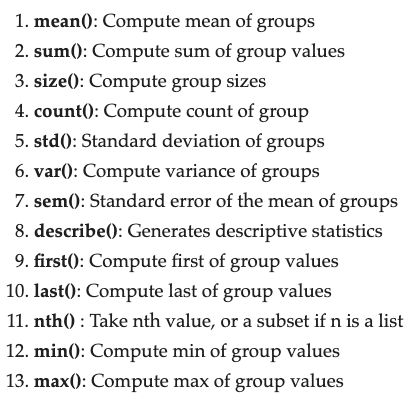


In [ ]:
#En este bloque se importa los datos de los csvs antes trabajados

import pandas as pd
import numpy as np
#previamente se cargaron nuestros archivos csv a una cuenta de google drive
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/MyDrive/Data_Proy"
from google.colab import drive
drive.mount('/content/drive')
df_mex_estados = pd.read_csv("/content/drive/MyDrive/Data_Proy/Estatal-Delitos-2015-2021_ene2021.csv", encoding='latin-1')
df_mex_municipios = pd.read_csv("/content/drive/MyDrive/Data_Proy/Municipal-Delitos-2015-2021_ene2021.csv", encoding='latin-1')
df_estados = pd.DataFrame(df_mex_estados)
df_municipios = pd.DataFrame(df_mex_municipios)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Estatal-Delitos-2015-2021_ene2021.csv  Municipal-Delitos-2015-2021_ene2021.csv
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Este el el dataframe de los datos organizados por municipio
df_municipios

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0.0,1.0,1.0,3.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588771,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1588772,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1588773,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1588774,2021,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#En este bloque se analiza si existe prescencias de nans en nuetsro dataframe
df_municipios.isna().sum(axis=0)

Año                            0
Clave_Ent                      0
Entidad                        0
Cve. Municipio                 0
Municipio                      0
Bien jurídico afectado         0
Tipo de delito                 0
Subtipo de delito              0
Modalidad                      0
Enero                          0
Febrero                   242158
Marzo                     242158
Abril                     242158
Mayo                      242158
Junio                     242158
Julio                     242158
Agosto                    242158
Septiembre                242158
Octubre                   242158
Noviembre                 242158
Diciembre                 242158
dtype: int64

In [ ]:
#En este bloque se elimina los nans
df_municipioslimpio= df_municipios.dropna(axis=0, how='any')

In [ ]:
#Aqui se corrobora si el codigo anterior se ejecuto de manera correcta
df_municipioslimpio.isna().sum(axis=0)

Año                       0
Clave_Ent                 0
Entidad                   0
Cve. Municipio            0
Municipio                 0
Bien jurídico afectado    0
Tipo de delito            0
Subtipo de delito         0
Modalidad                 0
Enero                     0
Febrero                   0
Marzo                     0
Abril                     0
Mayo                      0
Junio                     0
Julio                     0
Agosto                    0
Septiembre                0
Octubre                   0
Noviembre                 0
Diciembre                 0
dtype: int64

In [ ]:
df_municipioslimpio

,Año,Clave_Ent,Entidad,Cve. Municipio,Municipio,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
0,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma de fuego,2,0.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0
1,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con arma blanca,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,Con otro elemento,0,0.0,1.0,1.0,3.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0
3,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio doloso,No especificado,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015,1,Aguascalientes,1001,Aguascalientes,La vida y la Integridad corporal,Homicidio,Homicidio culposo,Con arma de fuego,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346613,2020,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Falsificación,Falsificación,Falsificación,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1346614,2020,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Contra el medio ambiente,Contra el medio ambiente,Contra el medio ambiente,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1346615,2020,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,Delitos cometidos por servidores públicos,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1346616,2020,32,Zacatecas,32058,Santa María de la Paz,Otros bienes jurídicos afectados (del fuero co...,Electorales,Electorales,Electorales,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#En esta parte scaamos la suma por mes de todos los años
mes=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre','Octubre','Noviembre','Diciembre']
for i in range(0,11):
  print('La suma del mes de ', mes[i], ' = ',  df_municipioslimpio[mes[i]].sum())

La suma del mes de  Enero  =  894267
La suma del mes de  Febrero  =  896080.0
La suma del mes de  Marzo  =  970568.0
La suma del mes de  Abril  =  902224.0
La suma del mes de  Mayo  =  951787.0
La suma del mes de  Junio  =  949497.0
La suma del mes de  Julio  =  948792.0
La suma del mes de  Agosto  =  973212.0
La suma del mes de  Septiembre  =  950207.0
La suma del mes de  Octubre  =  1001677.0
La suma del mes de  Noviembre  =  928524.0


In [ ]:
#En esta parte sacamos el minimo por mes de todos los años
for i in range(0,11):
  print('El min del mes de ', mes[i], ' =',  df_municipioslimpio[mes[i]].min())

El min del mes de  Enero  = 0
El min del mes de  Febrero  = 0.0
El min del mes de  Marzo  = 0.0
El min del mes de  Abril  = 0.0
El min del mes de  Mayo  = -1.0
El min del mes de  Junio  = 0.0
El min del mes de  Julio  = 0.0
El min del mes de  Agosto  = 0.0
El min del mes de  Septiembre  = -1.0
El min del mes de  Octubre  = 0.0
El min del mes de  Noviembre  = 0.0


In [ ]:
#Nos percatamos que habia un error en nuestro dataframe donde habia un -1 cuando
#suponemos que tendria que ser 1 por ende tenemos que limpiar los datos nuevamente

In [ ]:
df_municipioslimpio['Mayo']=df_municipioslimpio['Mayo'].replace([-1],1)
df_municipioslimpio['Septiembre']=df_municipioslimpio['Septiembre'].replace([-1],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#En esta parte sacamos el minimo por mes de todos los años
for i in range(0,11):
  print('El min del mes de ', mes[i], ' =',  df_municipioslimpio[mes[i]].min())

El min del mes de  Enero  = 0
El min del mes de  Febrero  = 0.0
El min del mes de  Marzo  = 0.0
El min del mes de  Abril  = 0.0
El min del mes de  Mayo  = 0.0
El min del mes de  Junio  = 0.0
El min del mes de  Julio  = 0.0
El min del mes de  Agosto  = 0.0
El min del mes de  Septiembre  = 0.0
El min del mes de  Octubre  = 0.0
El min del mes de  Noviembre  = 0.0


In [ ]:
#En esta parte sacamos el maximo por mes de todos los años
for i in range(0,11):
  print('El max del mes de ', mes[i], ' =',  df_municipioslimpio[mes[i]].max())

El max del mes de  Enero  = 1146
El max del mes de  Febrero  = 1212.0
El max del mes de  Marzo  = 1471.0
El max del mes de  Abril  = 1445.0
El max del mes de  Mayo  = 1444.0
El max del mes de  Junio  = 958.0
El max del mes de  Julio  = 1219.0
El max del mes de  Agosto  = 1140.0
El max del mes de  Septiembre  = 1099.0
El max del mes de  Octubre  = 1023.0
El max del mes de  Noviembre  = 1156.0
